# Laboratorio 3 - Segmentacion por Instancias

Nombre Completo: Juan Carlos Cerón Lombana
ID UAO: 2235516

Nombre Completo: Danny Mauricio Montero
ID UAO: 2244168

# Introduccion

La segmentación por instancias consiste en identificar objetos individuales en una imagen y segmentarlos del resto de la imagen.

El resultado de un modelo de segmentación de instancias es un conjunto de máscaras o contornos que delinean cada objeto de la imagen, junto con etiquetas de clase y puntuaciones de confianza para cada objeto. La segmentación de instancias es útil cuando se necesita saber no sólo dónde están los objetos en una imagen, sino también cuál es su forma exacta.

# Problema

La conservación de la biodiversidad es un reto crucial en el contexto actual de cambio climático y pérdida de hábitats naturales. Una de las estrategias más efectivas para monitorear y preservar la fauna salvaje es el uso de cámaras trampa. Estas cámaras permiten capturar imágenes y videos de diversas especies en su entorno natural sin interferencias humanas, proporcionando datos valiosos para los científicos y conservacionistas. Sin embargo, el análisis manual de estas imágenes puede ser una tarea ardua y propensa a errores.

Para abordar este desafío, la implementación de algoritmos de segmentación por instancia, como YOLOv8 (You Only Look Once), ofrece una solución prometedora. YOLOv8 es un modelo de detección y segmentación de objetos en tiempo real que permite identificar y clasificar cada instancia de las especies capturadas en las imágenes de las cámaras trampa con alta precisión y eficiencia. Al segmentar cada individuo en una imagen y diferenciar entre múltiples especies, el modelo facilita un análisis detallado y preciso de la biodiversidad en diferentes hábitats.

**Beneficios del Uso de YOLOv8 en la Conservación**

Identificación Precisa de Especies: Al utilizar YOLOv8, es posible identificar y clasificar con precisión a cada especie capturada en las cámaras trampa, proporcionando datos detallados sobre la presencia y el comportamiento de las diferentes especies.

Monitoreo Continuo: La capacidad de procesar imágenes en tiempo real permite un monitoreo continuo y eficiente de la fauna salvaje, detectando rápidamente cambios en las poblaciones y comportamientos de las especies.

Reducción de Errores Humanos: Automatizar el proceso de identificación y clasificación de especies minimiza los errores humanos, aumentando la fiabilidad de los datos recopilados.

Análisis de Tendencias a Largo Plazo: Con una base de datos extensa y precisa, los investigadores pueden analizar tendencias a largo plazo en la población y distribución de las especies, ayudando a tomar decisiones informadas para la conservación de la biodiversidad.


# Metricas

# Métricas de detección de objetos

A continuacion detallamos algunas de las metricas que ofrece YOLO v8

**Intersección sobre Unión (IoU):** IoU es una medida que cuantifica el solapamiento entre un cuadro delimitador previsto y un cuadro delimitador real. Desempeña un papel fundamental en la evaluación de la precisión de la localización de objetos.

**Precisión media (PA):** la PA calcula el área bajo la curva de precisión-recuperación, proporcionando un valor único que resume la precisión y la recuperación del modelo.

**Precisión media (Mean Average Precision, mAP):** la mAP amplía el concepto de AP calculando los valores medios de AP en varias clases de objetos. Esto resulta útil en escenarios de detección de objetos multiclase para proporcionar una evaluación exhaustiva del rendimiento del modelo.

**Precisión y recuperación:** La precisión cuantifica la proporción de verdaderos positivos entre todas las predicciones positivas, evaluando la capacidad del modelo para evitar falsos positivos. Por otro lado, Recall calcula la proporción de verdaderos positivos entre todos los positivos reales, midiendo la capacidad del modelo para detectar todos los casos de una clase.

**Puntuación F1:** La puntuación F1 es la media armónica de la precisión y la recuperación, lo que proporciona una evaluación equilibrada del rendimiento de un modelo teniendo en cuenta tanto los falsos positivos como los falsos negativos.

**Class Loss:** Pérdida asociada a la clasificación de la clase del objeto.

**Interpretación de los resultados**

Desglosemos la salida de la función model.val() y entendamos cada segmento de la salida.

**Métricas por clases**

Una de las secciones de la salida es el desglose por clases de las métricas de rendimiento. Esta información granular es útil cuando se intenta comprender el rendimiento del modelo para cada clase específica, especialmente en conjuntos de datos con una gama diversa de categorías de objetos. Para cada clase del conjunto de datos se proporciona lo siguiente:

**Clase:** Indica el nombre de la clase del objeto, como "persona", "coche" o "perro".

**Imágenes:** Esta métrica indica el número de imágenes del conjunto de validación que contienen la clase de objeto.

**Instancias:** Proporciona el recuento de cuántas veces aparece la clase en todas las imágenes del conjunto de validación.

**Box(P, R, mAP50, mAP50-95):** Esta métrica proporciona información sobre el rendimiento del modelo en la detección de objetos:

**P (Precisión):** La precisión de los objetos detectados, que indica cuántas detecciones fueron correctas.

**R (Recall):** La capacidad del modelo para identificar todas las instancias de objetos en las imágenes.

**mAP50:** Precisión media calculada con un umbral de intersección sobre unión (IoU) de 0,50. Es una medida de la precisión del modelo teniendo en cuenta solo las detecciones "fáciles".

**mAP50-95:** la media de la precisión media calculada con distintos umbrales de IoU, que van de 0,50 a 0,95. Ofrece una visión global del rendimiento del modelo en distintos niveles de dificultad de detección.



# Instalacion de paquetes necesarios

In [1]:
%pip install roboflow --quiet
%pip install -U ultralytics --quiet
%pip install wget --quiet
%pip install patool --quiet

# %pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Librerias usadas

In [2]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()
import yaml
import numpy as np
import cv2

from IPython.display import display, Image
import matplotlib.pyplot as plt
import cv2
import locale
locale.getpreferredencoding = lambda: "UTF-8"
import os
import shutil
import wget
import patoolib
import stat
HOME = os.getcwd()
print(HOME)

Ultralytics 8.3.50  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Xeon W-2145 3.70GHz)
Setup complete  (16 CPUs, 63.6 GB RAM, 288.7/475.9 GB disk)
c:\Users\dmontero\Documents\Laboratorio3


# Funciones propias

In [3]:
def rm_dir(ruta_carpeta):
    """
    Función para eliminar una carpeta si esta existe.
    
    Args:
        ruta_carpeta (str): La ruta de la carpeta a eliminar.
    """
    # Verificar si la carpeta existe
    if os.path.exists(ruta_carpeta) and os.path.isdir(ruta_carpeta):
        # Eliminar la carpeta y su contenido
        shutil.rmtree(ruta_carpeta)
        print(f'Carpeta eliminada: {ruta_carpeta}')

def eliminar_carpeta(ruta_carpeta):
    """
    Función para eliminar una carpeta y su contenido con permisos de administrador.
    Args:
        ruta_carpeta (str): La ruta de la carpeta a eliminar.
    """
    # Verificar si la carpeta existe
    if os.path.exists(ruta_carpeta) and os.path.isdir(ruta_carpeta):
        # Cambiar permisos para permitir acceso completo
        os.chmod(ruta_carpeta, stat.S_IRWXU)
        # Eliminar la carpeta y su contenido
        shutil.rmtree(ruta_carpeta)
        print(f'Carpeta eliminada: {ruta_carpeta}')
    else:
        print(f'La carpeta no existe: {ruta_carpeta}')
        

# Dataset 

Eusamos un conjunto de datos contiene 300 imágenes de tres tipos de animales: gatos, perros y zorros. Cada categoría tiene 100 imágenes, datset se encuentra en kaggle en la siguiennte url: https://www.kaggle.com/datasets/snmahsa/animal-image-dataset-cats-dogs-and-foxes


In [4]:
# Descargar el archivo zip desde GitHub
if os.path.isfile("./Animales.v1i.yolov8.zip"):
    os.remove("./Animales.v1i.yolov8.zip")

url_data_set = "https://github.com/dmmontero/data/raw/main/Animales.v1i.yolov8.zip" 
datase_file = wget.download(url_data_set)

In [5]:
# Elimino la carpeta de existir
rm_dir(rf"{HOME}\datos")
patoolib.extract_archive(datase_file,outdir="./datos")

INFO patool: Extracting Animales.v1i.yolov8.zip ...
INFO patool: could not find a 'file' executable, falling back to guess mime type by file extension
INFO patool: ... creating output directory `./datos'.
INFO patool: running "C:\Program Files\7-Zip\7z.EXE" x -aou -o./datos -- Animales.v1i.yolov8.zip
INFO patool: ... Animales.v1i.yolov8.zip extracted to `./datos'.


'./datos'

# Definicion y entrenamiento del modelo

In [6]:
# Eliminar carpeta de ejecuciones anteriores
rm_dir('./runs')

# Cargamos modelo preentrenado
model = YOLO("yolov8s-seg.pt")  # load a pretrained model (recommended for training)

# Entrenamos modelo y lo nombramos Yolo
results = model.train(data=f"{HOME}/datos/data.yaml", epochs=20, imgsz=640, batch=16, save=True, exist_ok=True, augment=False, seed=123, lr0=0.001, lrf=0.5, val=True, plots=True,project=f'{HOME}/runs/train', name='yolo' )

100%|██████████| 22.8M/22.8M [00:00<00:00, 65.8MB/s]


Ultralytics 8.3.50  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Xeon W-2145 3.70GHz)
engine\trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=c:\Users\dmontero\Documents\Laboratorio3/datos/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=c:\Users\dmontero\Documents\Laboratorio3/runs/train, name=yolo, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=123, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

train: Scanning C:\Users\dmontero\Documents\Laboratorio3\datos\train\labels... 42 images, 1 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<00:00, 550.14it/s]

train: New cache created: C:\Users\dmontero\Documents\Laboratorio3\datos\train\labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\dmontero\Documents\Laboratorio3\datos\valid\labels... 12 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<00:00, 476.31it/s]

val: New cache created: C:\Users\dmontero\Documents\Laboratorio3\datos\valid\labels.cache


Plotting labels to c:\Users\dmontero\Documents\Laboratorio3\runs\train\yolo\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to c:\Users\dmontero\Documents\Laboratorio3\runs\train\yolo
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.065      3.149      4.338      1.553         22        640: 100%|██████████| 3/3 [00:26<00:00,  8.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.64s/it]

                   all         12         14      0.333      0.199      0.238      0.221      0.333      0.199       0.24      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      0.893      2.297      3.165      1.427         27        640: 100%|██████████| 3/3 [00:25<00:00,  8.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]

                   all         12         14      0.413      0.699      0.546      0.444      0.413      0.699      0.546      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.7945      1.376      2.285      1.262         29        640: 100%|██████████| 3/3 [00:25<00:00,  8.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]

                   all         12         14       0.89      0.502        0.6      0.509       0.89      0.502       0.59      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G     0.8435      1.125      2.089      1.337         34        640: 100%|██████████| 3/3 [00:25<00:00,  8.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]

                   all         12         14      0.775      0.531      0.546      0.411      0.775      0.531      0.534      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.8753      1.094      2.211      1.391         24        640: 100%|██████████| 3/3 [00:25<00:00,  8.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]

                   all         12         14       0.72        0.5      0.516      0.315       0.72        0.5       0.52      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G     0.8096     0.8952       1.75      1.258         27        640: 100%|██████████| 3/3 [00:25<00:00,  8.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]

                   all         12         14      0.753      0.392      0.574      0.257      0.753      0.392      0.562      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G     0.8293     0.8264      1.694      1.295         31        640: 100%|██████████| 3/3 [00:25<00:00,  8.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]

                   all         12         14      0.431      0.807       0.62      0.368      0.431      0.807      0.622      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.8128     0.8472      1.583      1.339         25        640: 100%|██████████| 3/3 [00:24<00:00,  8.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]

                   all         12         14      0.409        0.8      0.558      0.373      0.409        0.8      0.558      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.7681     0.8358      1.587      1.251         23        640: 100%|██████████| 3/3 [00:25<00:00,  8.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]

                   all         12         14      0.322        0.8      0.506      0.395      0.322        0.8      0.494      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.7888     0.9242      1.377      1.291         24        640: 100%|██████████| 3/3 [00:24<00:00,  8.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]

                   all         12         14      0.438      0.781      0.667      0.542       0.39      0.749      0.624      0.531


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.5796     0.7775      1.527      1.111         10        640: 100%|██████████| 3/3 [00:25<00:00,  8.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all         12         14      0.829      0.437      0.513      0.407      0.827      0.433      0.453      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.5718     0.6715      1.388      1.193         10        640: 100%|██████████| 3/3 [00:24<00:00,  8.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         12         14      0.664      0.791      0.771      0.569      0.616      0.767      0.742      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.5602     0.6406      1.214      1.156         11        640: 100%|██████████| 3/3 [00:25<00:00,  8.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]

                   all         12         14      0.449      0.671      0.726      0.542      0.449      0.671      0.727      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.6111     0.6572      1.124      1.188         11        640: 100%|██████████| 3/3 [00:24<00:00,  8.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]

                   all         12         14      0.552      0.767      0.555      0.473      0.547      0.767      0.556      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.5568     0.5676      1.115      1.108         11        640: 100%|██████████| 3/3 [00:25<00:00,  8.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]

                   all         12         14      0.791      0.702       0.72      0.625      0.791      0.702      0.719       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.6103     0.6634      1.045      1.139         10        640: 100%|██████████| 3/3 [00:24<00:00,  8.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]

                   all         12         14      0.688      0.704      0.715      0.612      0.688      0.704      0.714      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.5806     0.6403     0.9069      1.133         10        640: 100%|██████████| 3/3 [00:24<00:00,  8.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]

                   all         12         14      0.632      0.556      0.627      0.512      0.632      0.556      0.626      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.6373     0.5821      1.258      1.201         11        640: 100%|██████████| 3/3 [00:24<00:00,  8.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]

                   all         12         14      0.823      0.706      0.785      0.535      0.823      0.706      0.776      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.5598     0.6123     0.9377      1.215          9        640: 100%|██████████| 3/3 [00:24<00:00,  8.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]

                   all         12         14      0.617      0.735      0.627      0.423      0.698      0.631       0.64      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      0.603     0.5617     0.9382      1.148         11        640: 100%|██████████| 3/3 [00:24<00:00,  8.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]

                   all         12         14      0.407      0.855      0.545       0.38      0.402        0.8      0.498        0.4



20 epochs completed in 0.163 hours.
Optimizer stripped from c:\Users\dmontero\Documents\Laboratorio3\runs\train\yolo\weights\last.pt, 23.9MB
Optimizer stripped from c:\Users\dmontero\Documents\Laboratorio3\runs\train\yolo\weights\best.pt, 23.9MB

Validating c:\Users\dmontero\Documents\Laboratorio3\runs\train\yolo\weights\best.pt...
Ultralytics 8.3.50  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Xeon W-2145 3.70GHz)
YOLOv8s-seg summary (fused): 195 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


                   all         12         14      0.792      0.702       0.72      0.625      0.792      0.702       0.72       0.56
                  gato          3          3      0.731          1      0.913       0.83      0.731          1      0.913      0.665
                 perro          1          1      0.644          1      0.995      0.895      0.644          1      0.995      0.895
                 zorro          7         10          1      0.105      0.254      0.148          1      0.105      0.251      0.118
Speed: 1.3ms preprocess, 169.4ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to c:\Users\dmontero\Documents\Laboratorio3\runs\train\yolo


# Matríz de confusión
A continucion mostramos la resultados obtenido en nuetra matriz de confusion, cabe anotar que para un probema de segmentacion se adIciona una columna y una fila que representan el "fondo", que no pertenece a ninguna de las clases existentes. Por ejemplo, si hay m clases en el conjunto de datos, el tamaño de la matriz de confusión debería ser (m+1)*(m+1).

**Cómo Interpretar la Matriz**

Verdadero Positivo (TP): Los números diagonales (por ejemplo, 6 en "Real: Zorro" vs "Predicción: Zorro") indican los verdaderos positivos, es decir, las veces que el modelo predijo correctamente la clase.

Falsos Negativos (FN): Los números fuera de la diagonal en la fila correspondiente a una clase real (por ejemplo, 4 en "Real: Zorro" vs "Predicción: Fondo") indican las veces que esa clase fue confundida con otra clase. En este caso, hay 4 zorros que fueron confundidos con "fondo".

Falsos Positivos (FP): Los números fuera de la diagonal en la columna correspondiente a una clase predicha (por ejemplo, 2 en "Real: Zorro" vs "Predicción: Zorro") indican las veces que otras clases fueron confundidas con esa clase. En este caso, hay 2 zorros que fueron clasificados incorrectamente como gatos.

Verdadero Negativo (TN): Son los números que no están directamente visibles en la matriz de confusión pero se pueden calcular. Representan las instancias que no pertenecen a la clase en cuestión y fueron correctamente identificadas como no pertenecientes a esa clase.

**Ejemplo de Cálculo de Métricas**

Tomemos el ejemplo del "Zorro" en nuestra matriz de confusión:

TP (Zorro): 6

FN (Zorro): 4+2 = 6

FP (Zorro): 3=1 = 4

TN (Zorro): (todos los otros casos correctos)

Precisión para "Zorro": Precisión = TP/(TP+FN) = (6)/(6 + 6) =  0.5 =>  mide la capacidad del modelo para identificar todas las instancias relevantes
Recall para "Zorro": Recall = TP/(TP+FP) = 6/(6+4) = 0.6 => indica cuántas de las predicciones positivas del modelo son realmente correctas

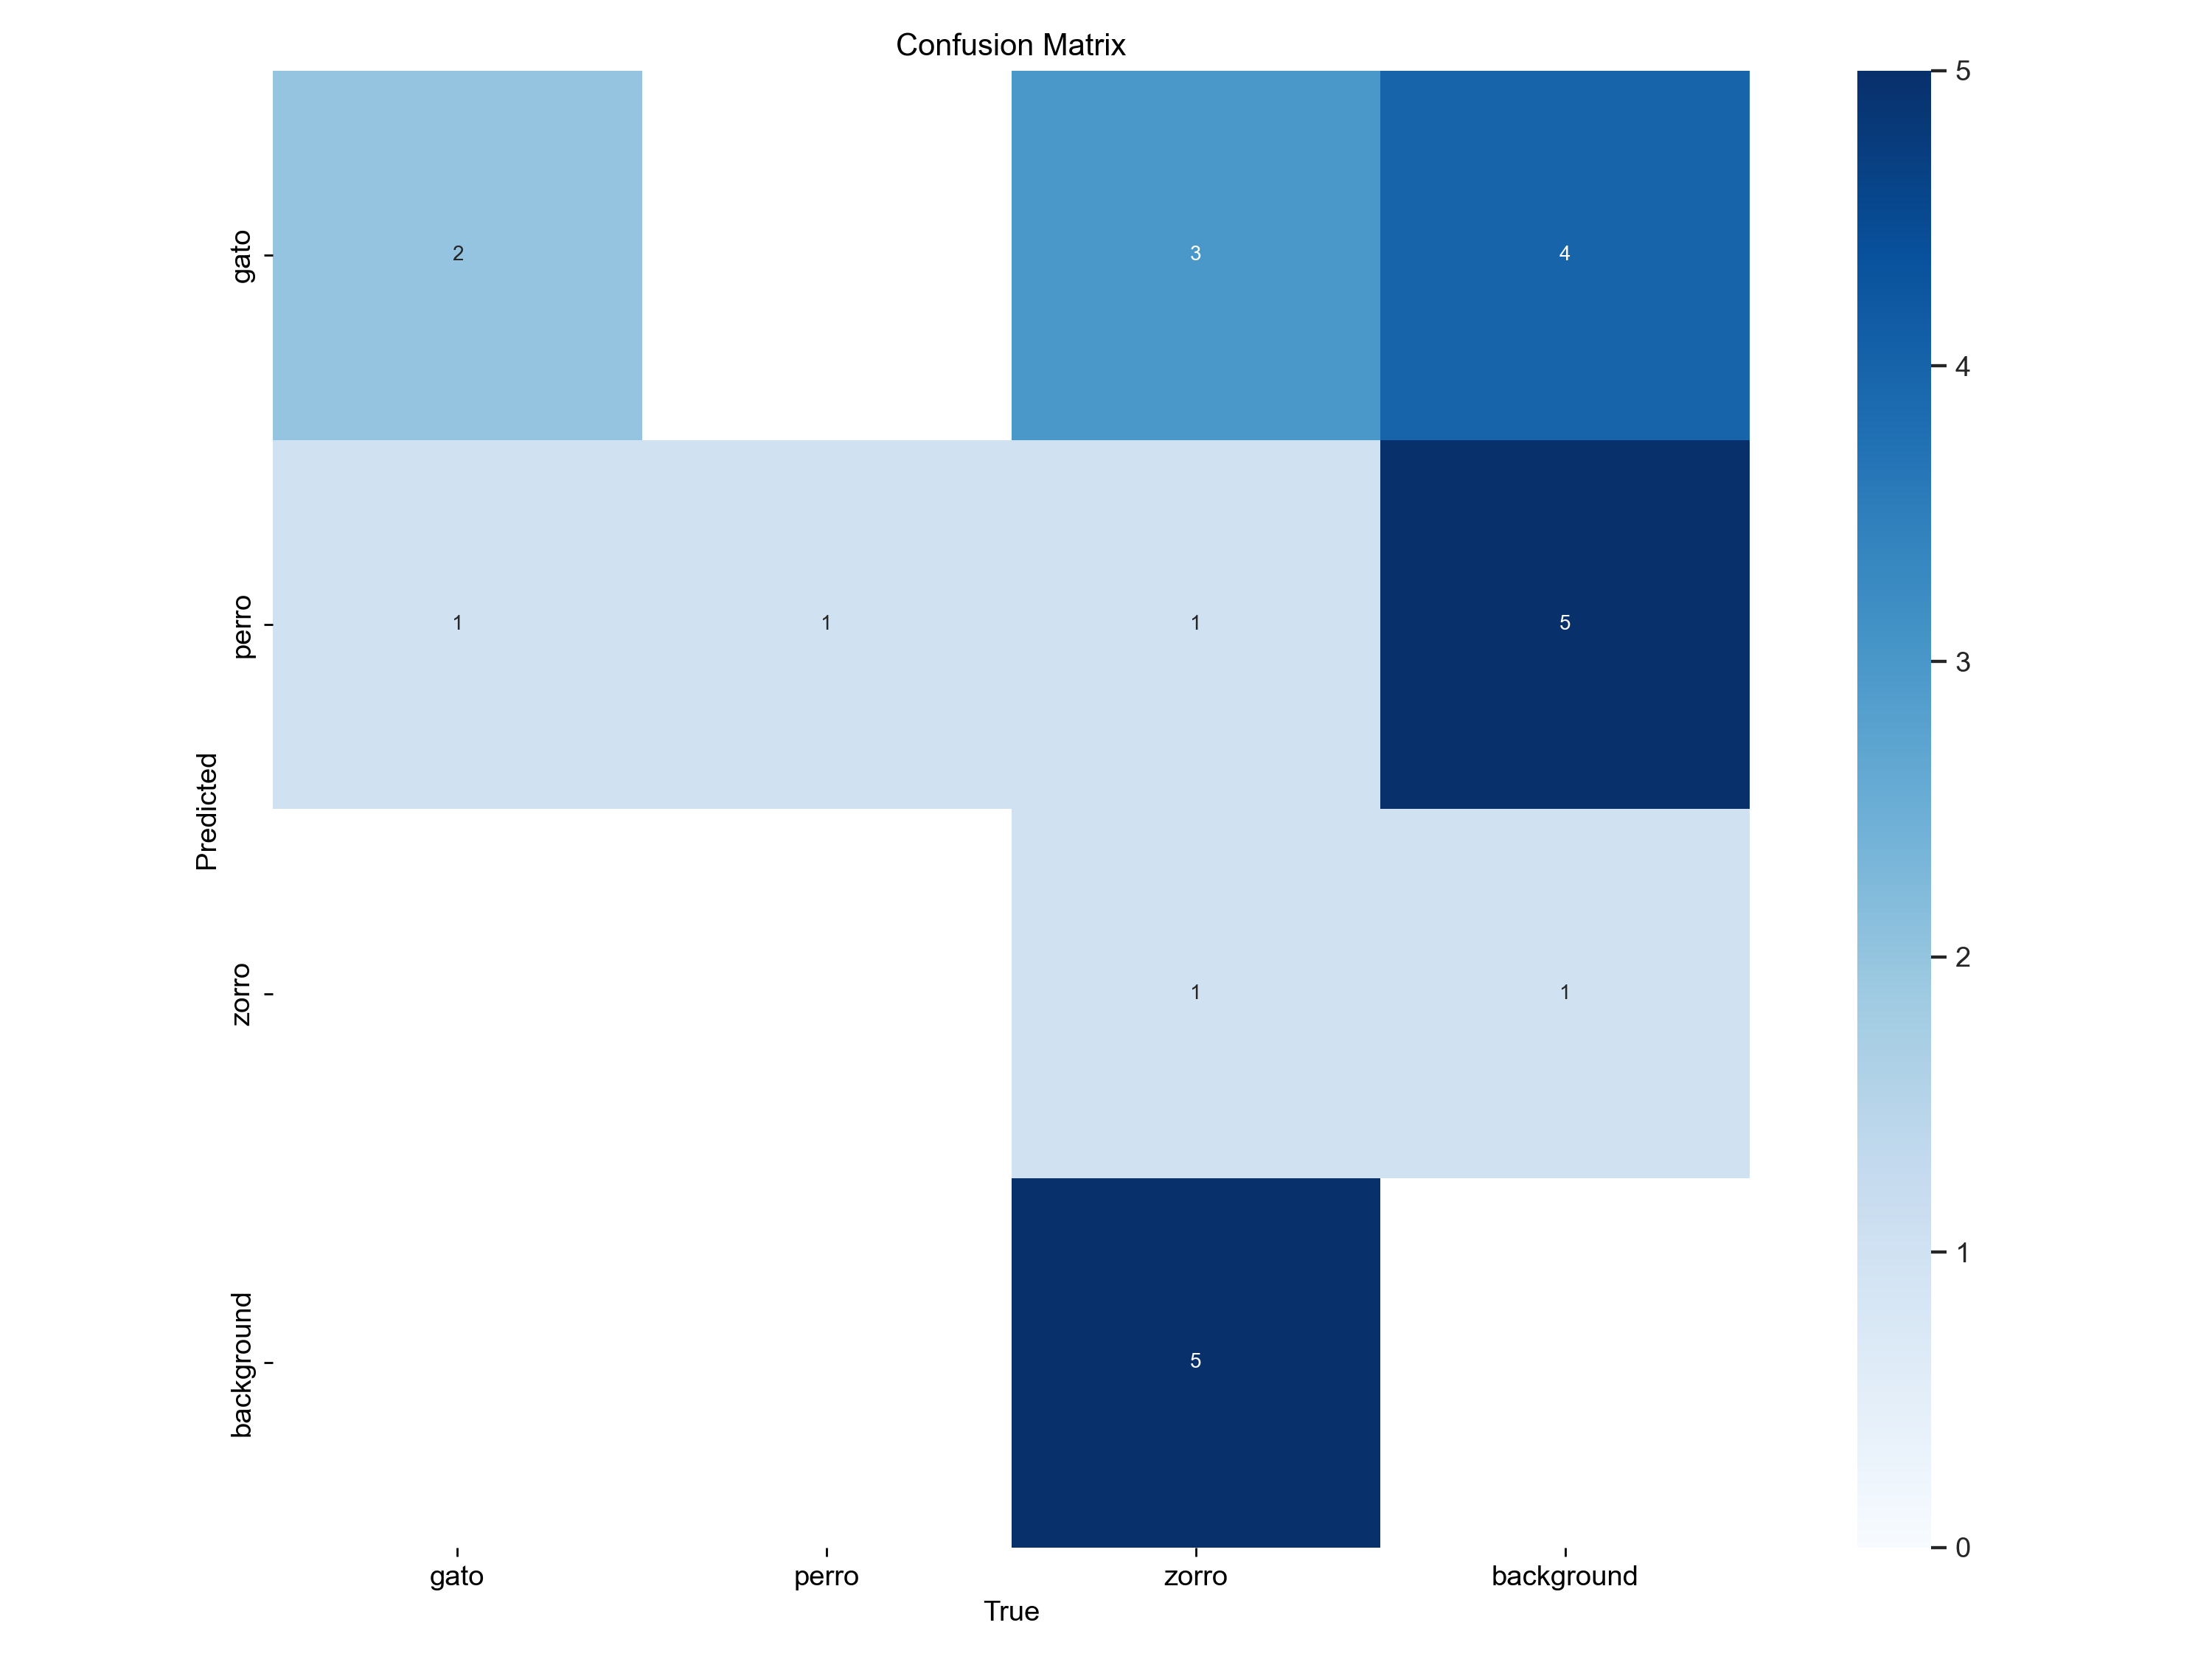

In [7]:
# from IPython.display import Image, display
Image(filename=rf'{results.save_dir}\confusion_matrix.png', width=800)

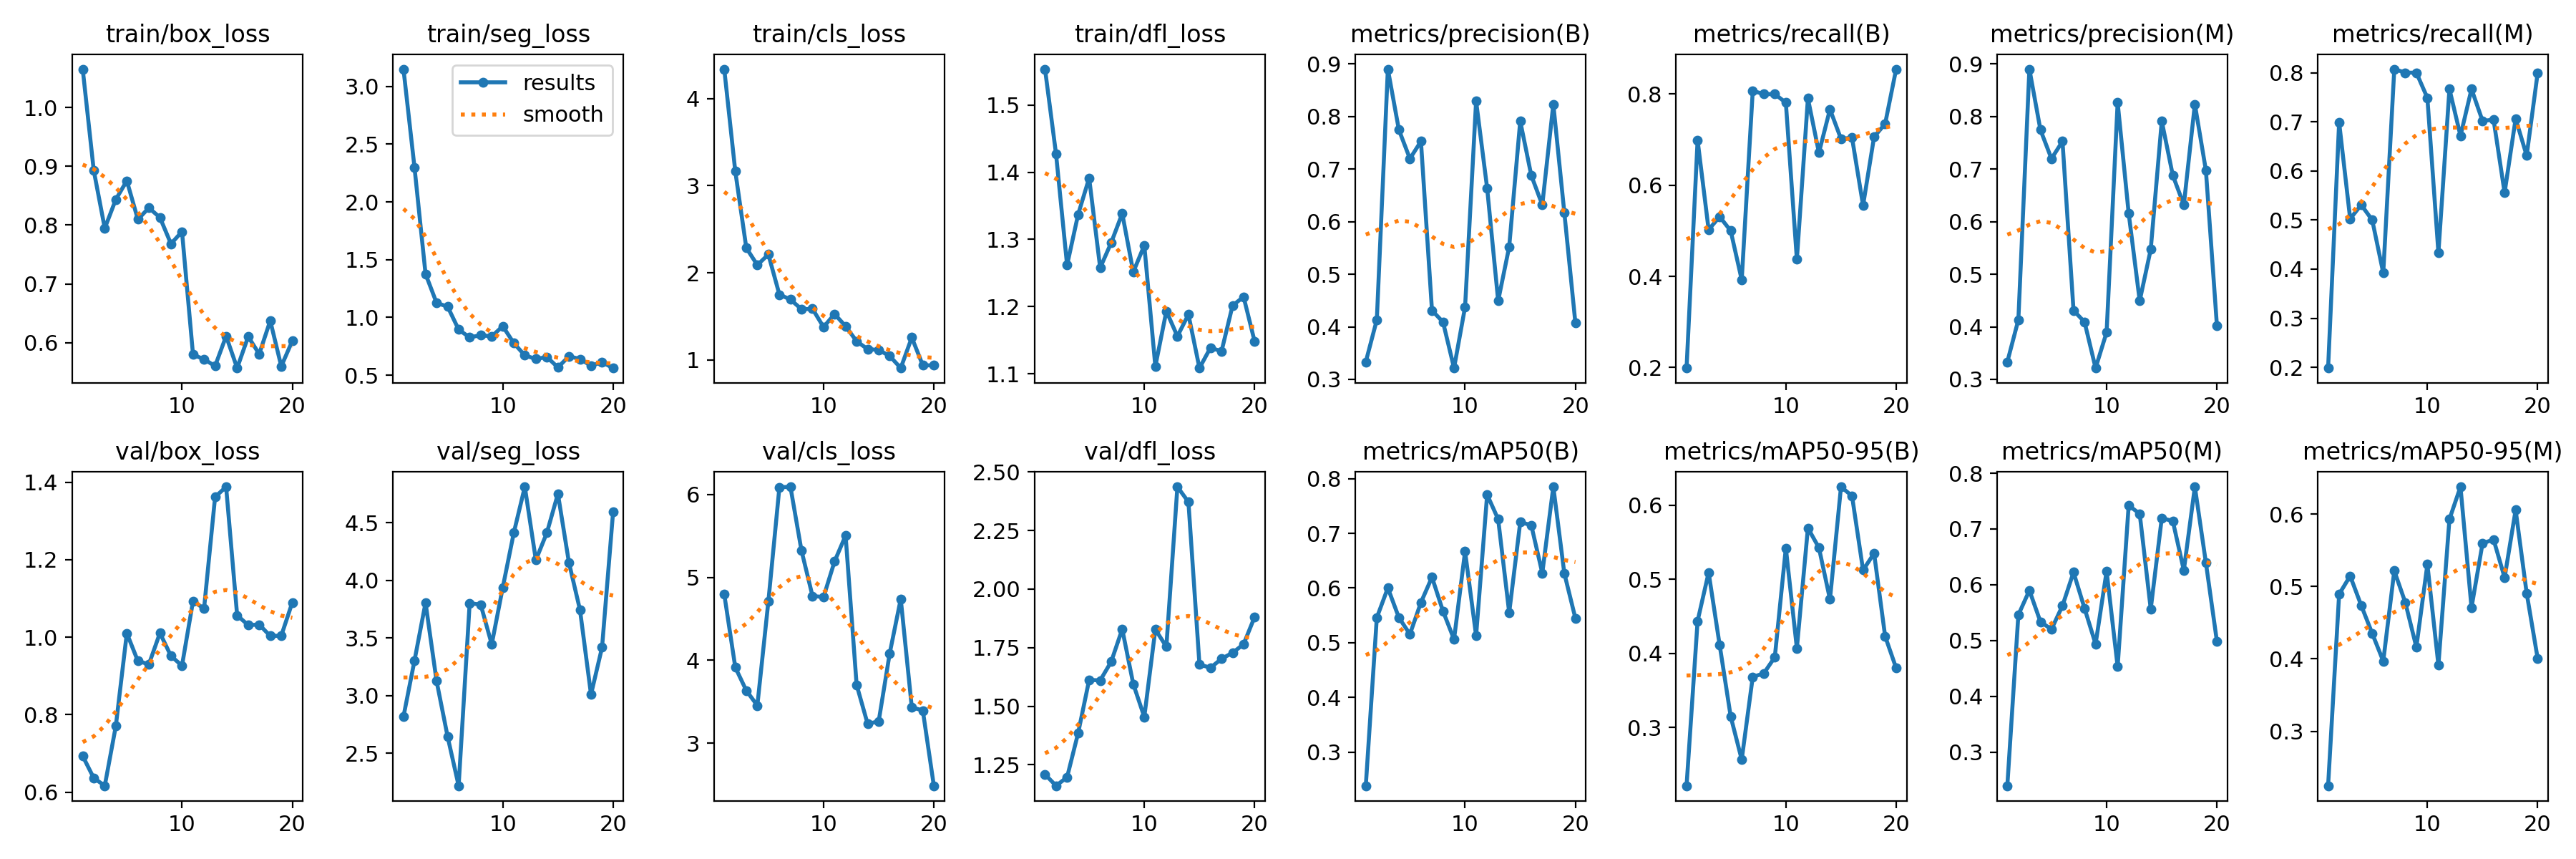

In [8]:
Image(filename=rf'{results.save_dir}\results.png')

In [9]:
# Validamos el modelo
validation_results = model.val(data=f"{HOME}/datos/data.yaml", imgsz=640, batch=16, conf=0.25, iou=0.6) 

Ultralytics 8.3.50  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Xeon W-2145 3.70GHz)
YOLOv8s-seg summary (fused): 195 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs


val: Scanning C:\Users\dmontero\Documents\Laboratorio3\datos\valid\labels.cache... 12 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


                   all         12         14      0.792      0.702      0.836      0.704      0.792      0.702      0.836      0.633
                  gato          3          3      0.731          1      0.913      0.838      0.731          1      0.913      0.685
                 perro          1          1      0.644          1      0.995      0.895      0.644          1      0.995      0.895
                 zorro          7         10          1      0.105        0.6      0.378          1      0.105        0.6      0.318
Speed: 1.7ms preprocess, 153.9ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to c:\Users\dmontero\Documents\Laboratorio3\runs\train\yolo


In [10]:
print(validation_results.box.map)  # mAP50-95
print(validation_results.box.map50)  # mAP50
print(validation_results.box.map75)  # mAP75
print(validation_results.box.maps)  # list of mAP50-95 for each category

0.703951041666667
0.8358333333333334
0.7433333333333335
[    0.83835      0.8955       0.378]


https://docs.ultralytics.com/es/modes/predict/#inference-sources

In [11]:
#Eliminamos resultados anteriores
rm_dir('./predictions')

In [12]:
# Ruta a la carpeta con las imágenes
image_folder = rf'{HOME}\datos\valid\images'
result_folder = rf'{HOME}\predictions\Yolo'

# Crear la carpeta para guardar las predicciones
os.makedirs(result_folder, exist_ok=True)

# Ejecutar predicciones en todas las imágenes del directorio
predictions = model.predict(source=image_folder, save=True, project=result_folder,imgsz=320, conf=0.5, name='yolo_predictions')


image 1/12 c:\Users\dmontero\Documents\Laboratorio3\datos\valid\images\cat048_jpg.rf.ec1c4bab0165a73626fa136a56d823ba.jpg: 320x320 1 gato, 126.2ms
image 2/12 c:\Users\dmontero\Documents\Laboratorio3\datos\valid\images\cat054_jpg.rf.3198d62acfe11949ff568f18b40ce0e4.jpg: 320x320 2 gatos, 37.0ms
image 3/12 c:\Users\dmontero\Documents\Laboratorio3\datos\valid\images\cat056_jpg.rf.047463c7967ac69332b0f7e183765824.jpg: 320x320 1 gato, 47.4ms
image 4/12 c:\Users\dmontero\Documents\Laboratorio3\datos\valid\images\dog096_jpg.rf.a5240d4b8148d864dff32ce145095902.jpg: 320x320 1 perro, 53.8ms
image 5/12 c:\Users\dmontero\Documents\Laboratorio3\datos\valid\images\dog103_jpg.rf.0b2dc94d5bdf7d8302a62c2c0125768b.jpg: 320x320 3 perros, 46.9ms
image 6/12 c:\Users\dmontero\Documents\Laboratorio3\datos\valid\images\fox082_jpg.rf.571cc56b3389fe177d914cbb9a5e7c3e.jpg: 320x320 1 gato, 62.9ms
image 7/12 c:\Users\dmontero\Documents\Laboratorio3\datos\valid\images\fox083_jpg.rf.08859274800cebaf7c26712bde75ab44.j

C:\Users\dmontero\AppData\Local\Temp\ipykernel_31432\1244362365.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import Image, display


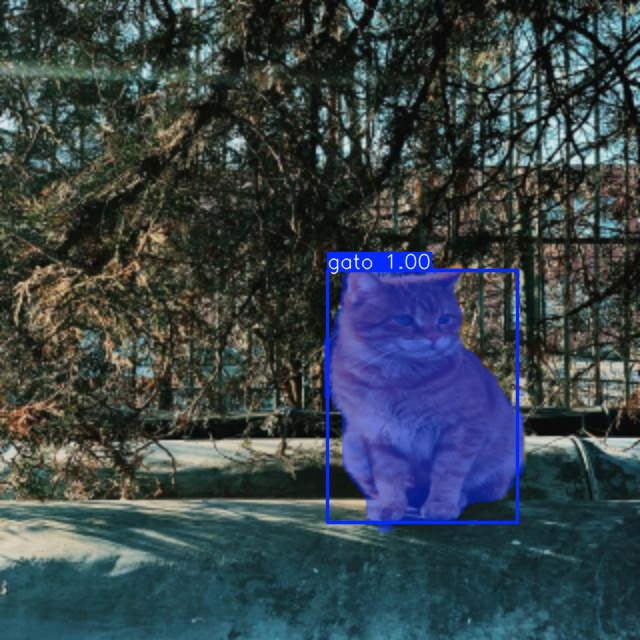

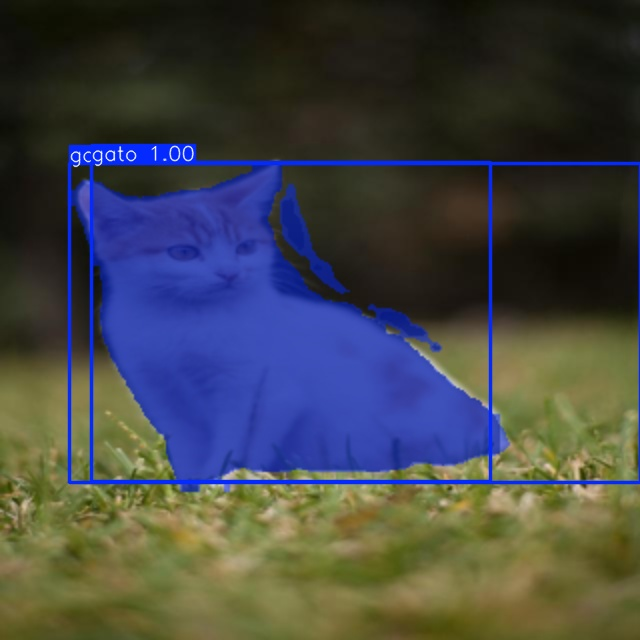

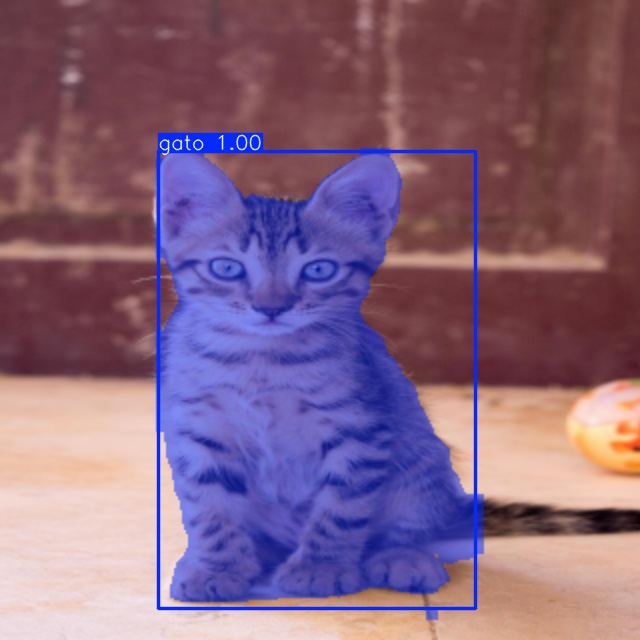

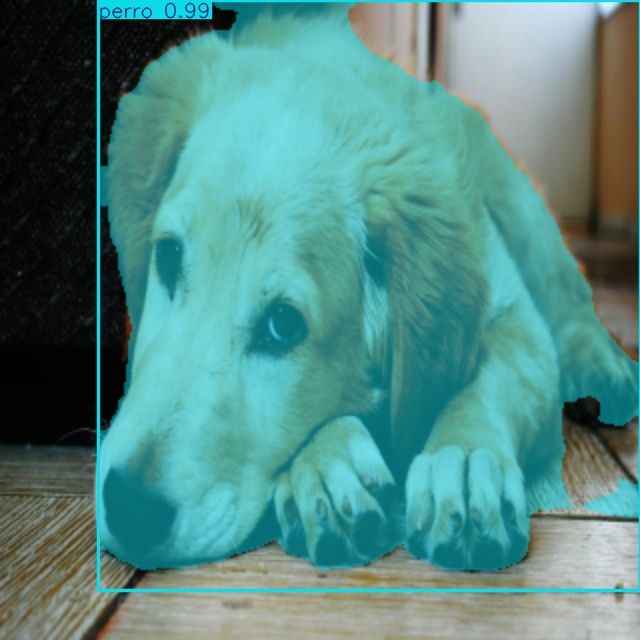

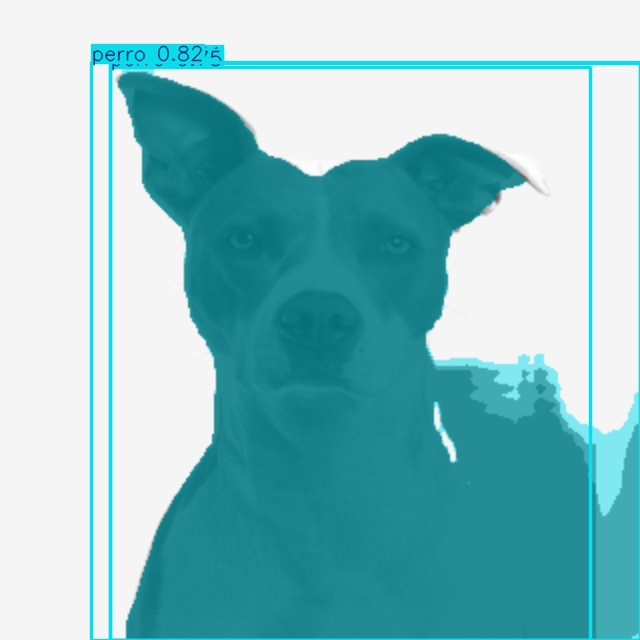

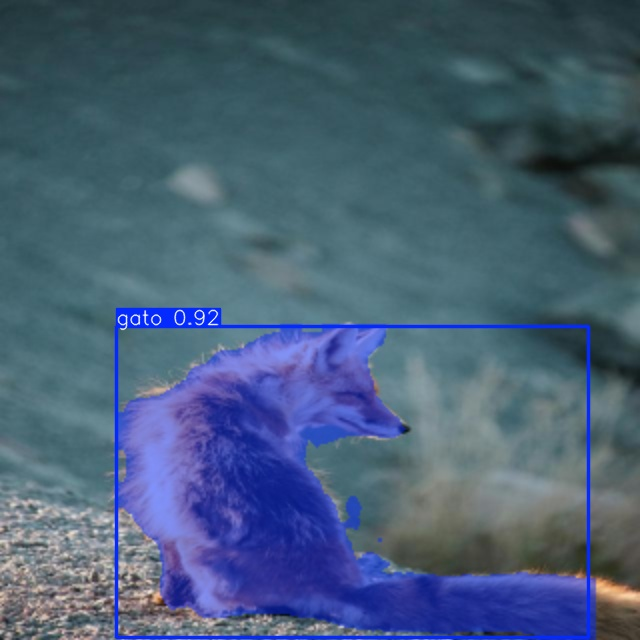

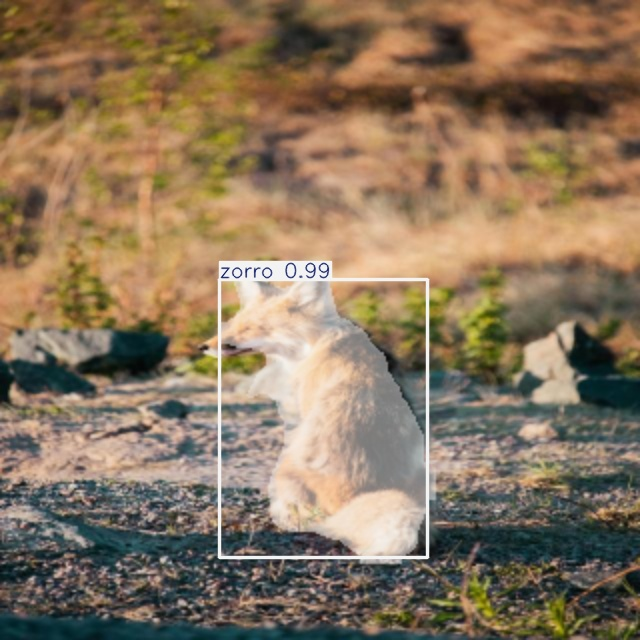

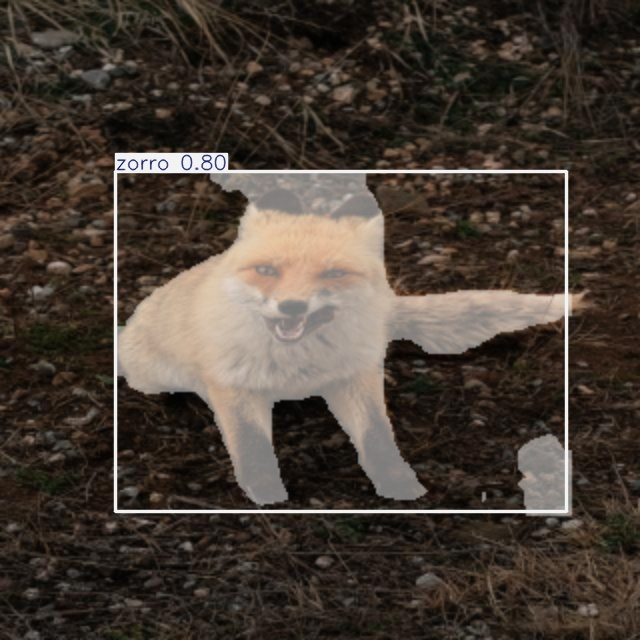

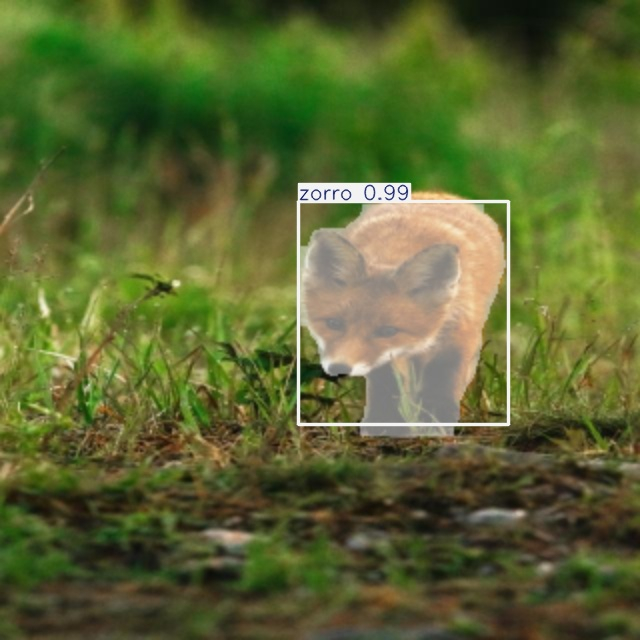

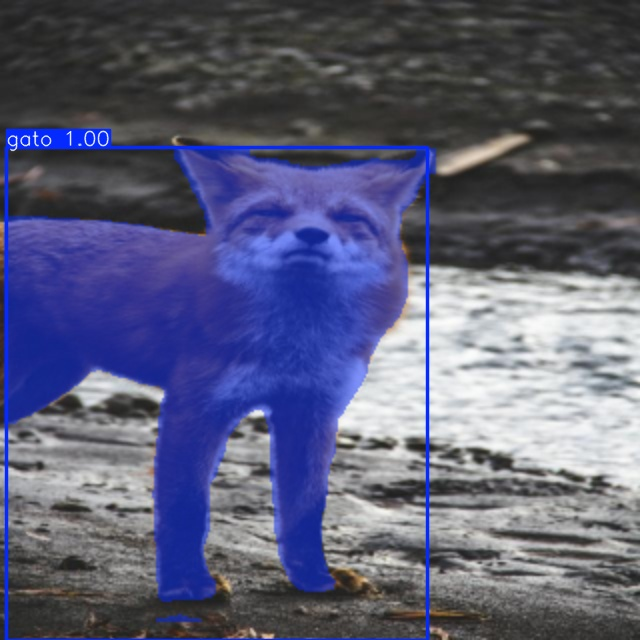

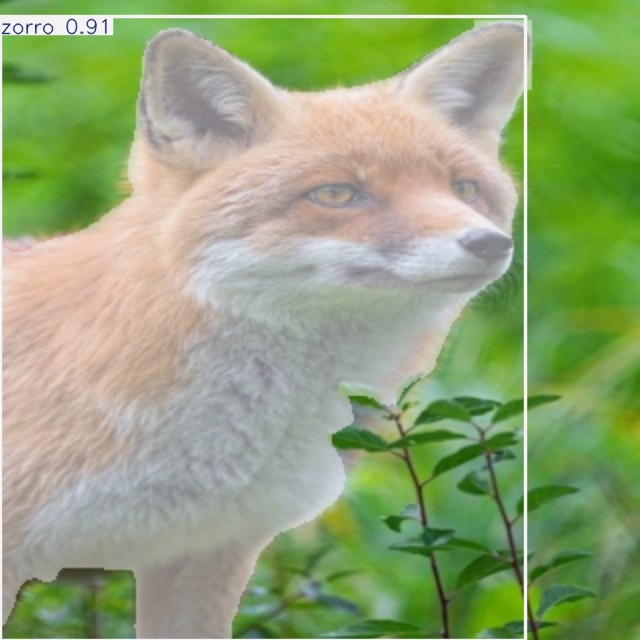

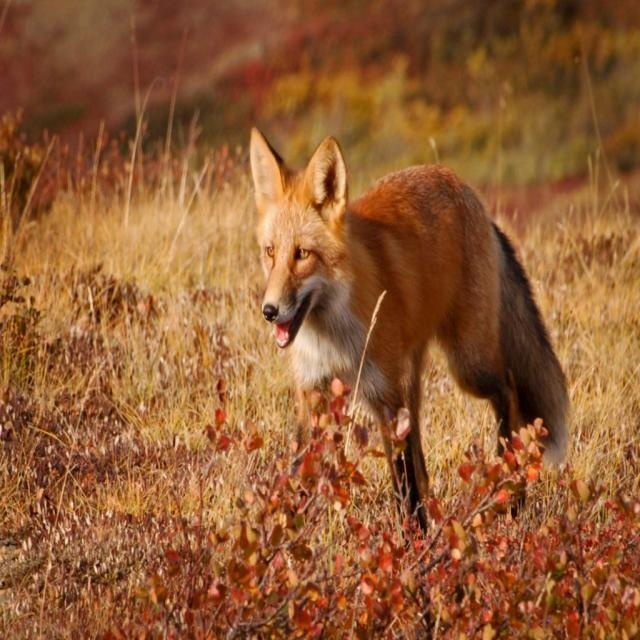

In [13]:
# from IPython.display import Image, display
# import matplotlib.image as mpimg
# Ruta a la carpeta con los resultados
result_images = os.path.join(result_folder, 'yolo_predictions')
# Listar las imágenes con resultados
result_files = [os.path.join(result_images, f) for f in os.listdir(result_images) if f.endswith('.jpg')]

# Mostrar las primeras 5 imágenes con resultados
for img_path in result_files:
    display(Image(filename=img_path, width=320, height=320, unconfined=True))

# Cargar los modelos previamente entrenados

A continuación evaluaremos los modelos previamente entrenado, capturaremos video y evaluaremos el modelos con la secuencia capturada.

In [23]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
print(HOME)

c:\Users\Tatiana\Documents\GitHub\Laboratorio3_VC


C:\Users\Tatiana\AppData\Local\Temp\ipykernel_20464\3467945857.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import Image, display


In [24]:
# Obtener la ruta actual de trabajo
HOME = os.getcwd()

# Cargar el modelo YOLOv8 previamente entrenado
model_path = f"{HOME}/runs/train/yolo/weights/best.pt" 
model = YOLO(model_path)

In [25]:
def evaluarVideo(modelo):
    """Captura video y segmenta la captura

    Args:
        modelo (YOLO): Modelo con el cual se evaluara
    """    
    
    # Iniciar la captura de video desde la cámara (0 = cámara por defecto)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: No se pudo abrir la cámara.")
        exit()

    # Configurar matplotlib para modo interactivo
    plt.ion()
    fig, ax = plt.subplots(figsize=(10, 6))

    # Bucle para capturar video continuamente
    while True:
        # Capturar un frame de la cámara
        ret, frame = cap.read()
        if not ret:
            print("Error: No se pudo capturar el frame.")
            break

        # Redimensionar el frame para garantizar un tamaño compatible con el modelo (por ejemplo, 640x640)
        resized_frame = cv2.resize(frame, (640, 640))

        # Realizar la predicción de segmentación
        results = modelo.predict(resized_frame, conf=0.15, iou=0.5, verbose=False)

        # Extraer la cantidad de instancias detectadas
        num_instances = len(results[0].boxes)
        print(f"Cantidad de instancias detectadas: {num_instances}")

        # Dibujar las segmentaciones en el frame
        annotated_frame = results[0].plot()

        # Convertir el frame anotado de BGR a RGB para matplotlib
        annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

        # Mostrar el frame anotado con matplotlib
        ax.clear()
        ax.imshow(annotated_frame_rgb)
        ax.set_title(f"Cantidad de instancias detectadas: {num_instances}")
        ax.axis('off')
        plt.draw()
        plt.pause(0.01)

        # Salir del bucle al cerrar la ventana de matplotlib
        if not plt.fignum_exists(fig.number):
            break

    # Liberar la cámara y cerrar la ventana de matplotlib
    cap.release()
    plt.close()

# Capturas de video evaluadas

A continuación evaluaremos diferentes capturas de video con el modelo previamente entrenado

Cantidad de instancias detectadas: 2


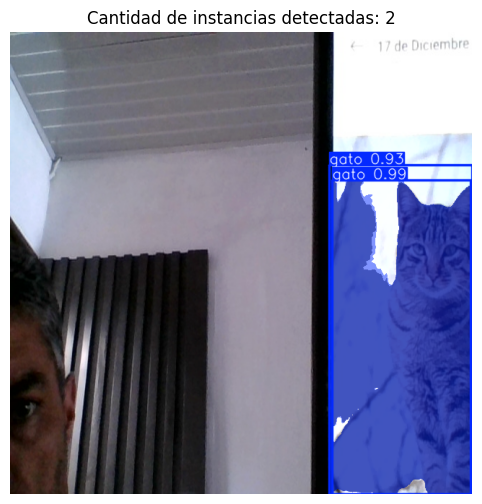

In [36]:
evaluarVideo(model)